### Lan Ma

### Yi Xie

### Final Assignment

##### Everyone worked equally on this project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from statsmodels.formula.api import logit
from sklearn import metrics
from sklearn.linear_model import Lasso

In [2]:
data = pd.read_csv('melb_data.csv')

In [3]:
data.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


##### 1. Do the following to explore the data.

##### (a) Print the number of missing values for each variable. Are there any variables that you think might have issues from this?

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [5]:
data.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [6]:
data.isna().sum()/data.count().max()*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.456554
Landsize          0.000000
BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

##### Car has 62 missing values, which is only 0.5% of total records. We can set these null values to 0 indicating there is no carspot for the house.
##### BuildingArea has 6450 missing values, which is about 50% of total records, which we think this would be a problem if we included these nulls in the regression model.
##### YearBuilt has 5375 missing values, which is about 40% of total records, which we think this would be a problem if we included these nulls in the regression model.
##### CouncilArea has 1369 missing values, which is about 10% of total records. which we think we could just use Regionname instead in the model.

In [7]:
data2 = data[data['BuildingArea'].notna()]
data2 = data2[data2['YearBuilt'].notna()]
data2['Car'] = data2['Car'].fillna(0)
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6858 entries, 1 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         6858 non-null   object 
 1   Address        6858 non-null   object 
 2   Rooms          6858 non-null   int64  
 3   Type           6858 non-null   object 
 4   Price          6858 non-null   float64
 5   Method         6858 non-null   object 
 6   SellerG        6858 non-null   object 
 7   Date           6858 non-null   object 
 8   Distance       6858 non-null   float64
 9   Postcode       6858 non-null   float64
 10  Bedroom2       6858 non-null   float64
 11  Bathroom       6858 non-null   float64
 12  Car            6858 non-null   float64
 13  Landsize       6858 non-null   float64
 14  BuildingArea   6858 non-null   float64
 15  YearBuilt      6858 non-null   float64
 16  CouncilArea    6196 non-null   object 
 17  Lattitude      6858 non-null   float64
 18  Longtit

##### YearBuilt and BuildingArea, Car seem to be related to housing price. We could just exclude records that have a null value in YearBuilt and BuildingArea, and set null value in Car to be 0. There will be 6858 entries which we think is enough to be used to build a model. 

##### (b) Create a bar chart that shows the median housing price for each Regionname Do you think that Regionname will affect housing price?

In [8]:
data.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [9]:
data_descirbe = data.groupby('Regionname').Price.describe().reset_index()
data_descirbe.head()

,Regionname,count,mean,std,min,25%,50%,75%,max
0,Eastern Metropolitan,1471.0,1.104080e+06,467417.860272,288000.0,775000.0,1010000.0,1329000.0,4000000.0
1,Eastern Victoria,53.0,6.999808e+05,165498.190135,400000.0,608500.0,670000.0,780000.0,1085000.0
2,Northern Metropolitan,3890.0,8.981711e+05,443967.693818,145000.0,600000.0,806250.0,1100000.0,4525000.0
3,Northern Victoria,41.0,5.948293e+05,217761.670461,330000.0,427500.0,540000.0,745000.0,1355000.0
4,South-Eastern Metropolitan,450.0,9.229438e+05,506525.336100,266000.0,665000.0,850000.0,1067750.0,9000000.0


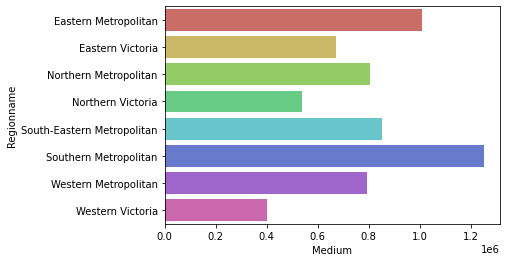

In [10]:
ax = sns.barplot(y = 'Regionname',x = '50%',data = data_descirbe, palette = 'hls')
ax.set(xlabel='Medium')
plt.show()

#### Different region has different prices. Regionname might affect housing price. 

##### (c) Use seaborn’s lmplot function to create a scatter plot with Lattitude on the x-axis and Longtitude on the y-axis colored by Distance (Hint: set legend and fit reg to False). What is this?

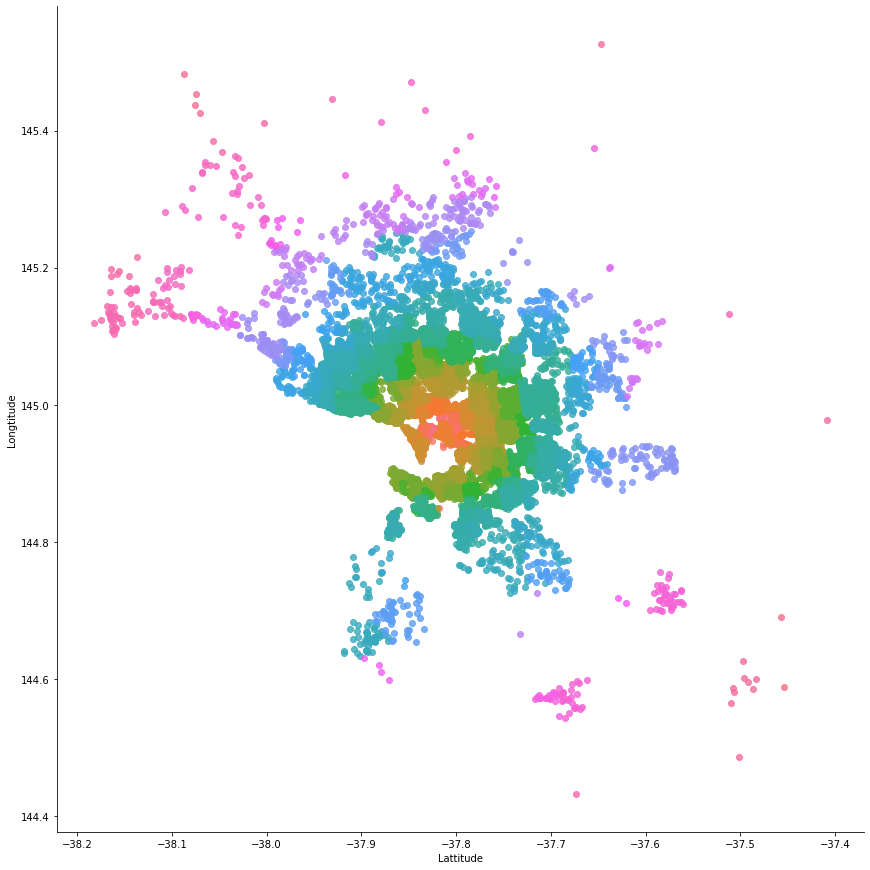

In [11]:
fig2 = sns.lmplot(x = 'Lattitude',y = 'Longtitude', hue = 'Distance',
                  data = data, legend = False, fit_reg=False, height=12, aspect=1)

##### Those houses postions in different regionname are not too far and concentrated. The longtitude is between 144 and 146 . The Lattitude is between -37 and -38. 

##### It looks like a house plotting map in the areas around Melbourne, Victoria, Australia.

##### 2. Assume that the mean of Price in this dataset is the population mean for housing prices in Melbourne. Choose a particular Region, take a random sample of 25 houses from Regionname and conduct a z-test with level of significance α = 0.05 to decide if housing prices in this Region differ from the population mean significantly. Use the standard error of the sample as the variance for the distribution of sample means.
##### (a) What are the Null and Alternative Hypothesis?

In [12]:
pop_mean = data.Price.mean()
pop_mean

1075684.079455081

##### Choose 'Northern Metropolitan' Region here. 

In [13]:
df_sample = data[data.Regionname=='Northern Metropolitan'].sample(n=25)
sample_mean = df_sample.Price.mean()
sample_mean

844080.0

In [14]:
len(df_sample)

25

This sets up the Hypothesis Test:

$H_0: \mu_{\text{NM}} = 1075684.079$

$H_a: \mu_{\text{NM}} \neq 1075684.079$

$H_0$ is Null Hypothesis. $H_a$ is the alternative Hypothesis.

##### (b) Use the p-value to decide whether to reject or fail to reject.

In [15]:
import scipy.stats

In [16]:
std_error=scipy.stats.sem(df_sample['Price'],nan_policy = 'omit')
std_error

66863.70889104692

In [17]:
z = (sample_mean - pop_mean) / (std_error)
z

-3.4638233998128216

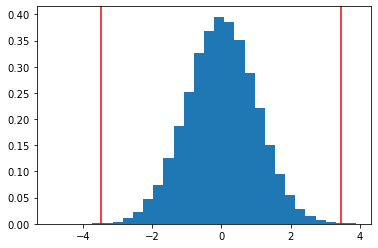

In [18]:
ndst = np.random.normal(0, 1, 100000)
plt.hist(ndst, bins=30, density=True)
plt.axvline(x=-z,color = 'red')
plt.axvline(x=z,color = 'red')
plt.show()

In [19]:
def p_left_of_z(z):
    return scipy.stats.norm(0, 1).cdf(z)

In [20]:
p = 2*p_left_of_z(z)
p

0.000532556012980105

##### Beacuse p is less than α (0.05)，We reject the $H_0$. 

##### 3. Find two variables that are linearly correlated and provide the three pieces of evidence below:
##### (a) Scattor plot of the two variables

In [21]:
df_num = data.drop(['Type','Method','Date','Address','Suburb','SellerG','CouncilArea','Regionname'],axis = 1)

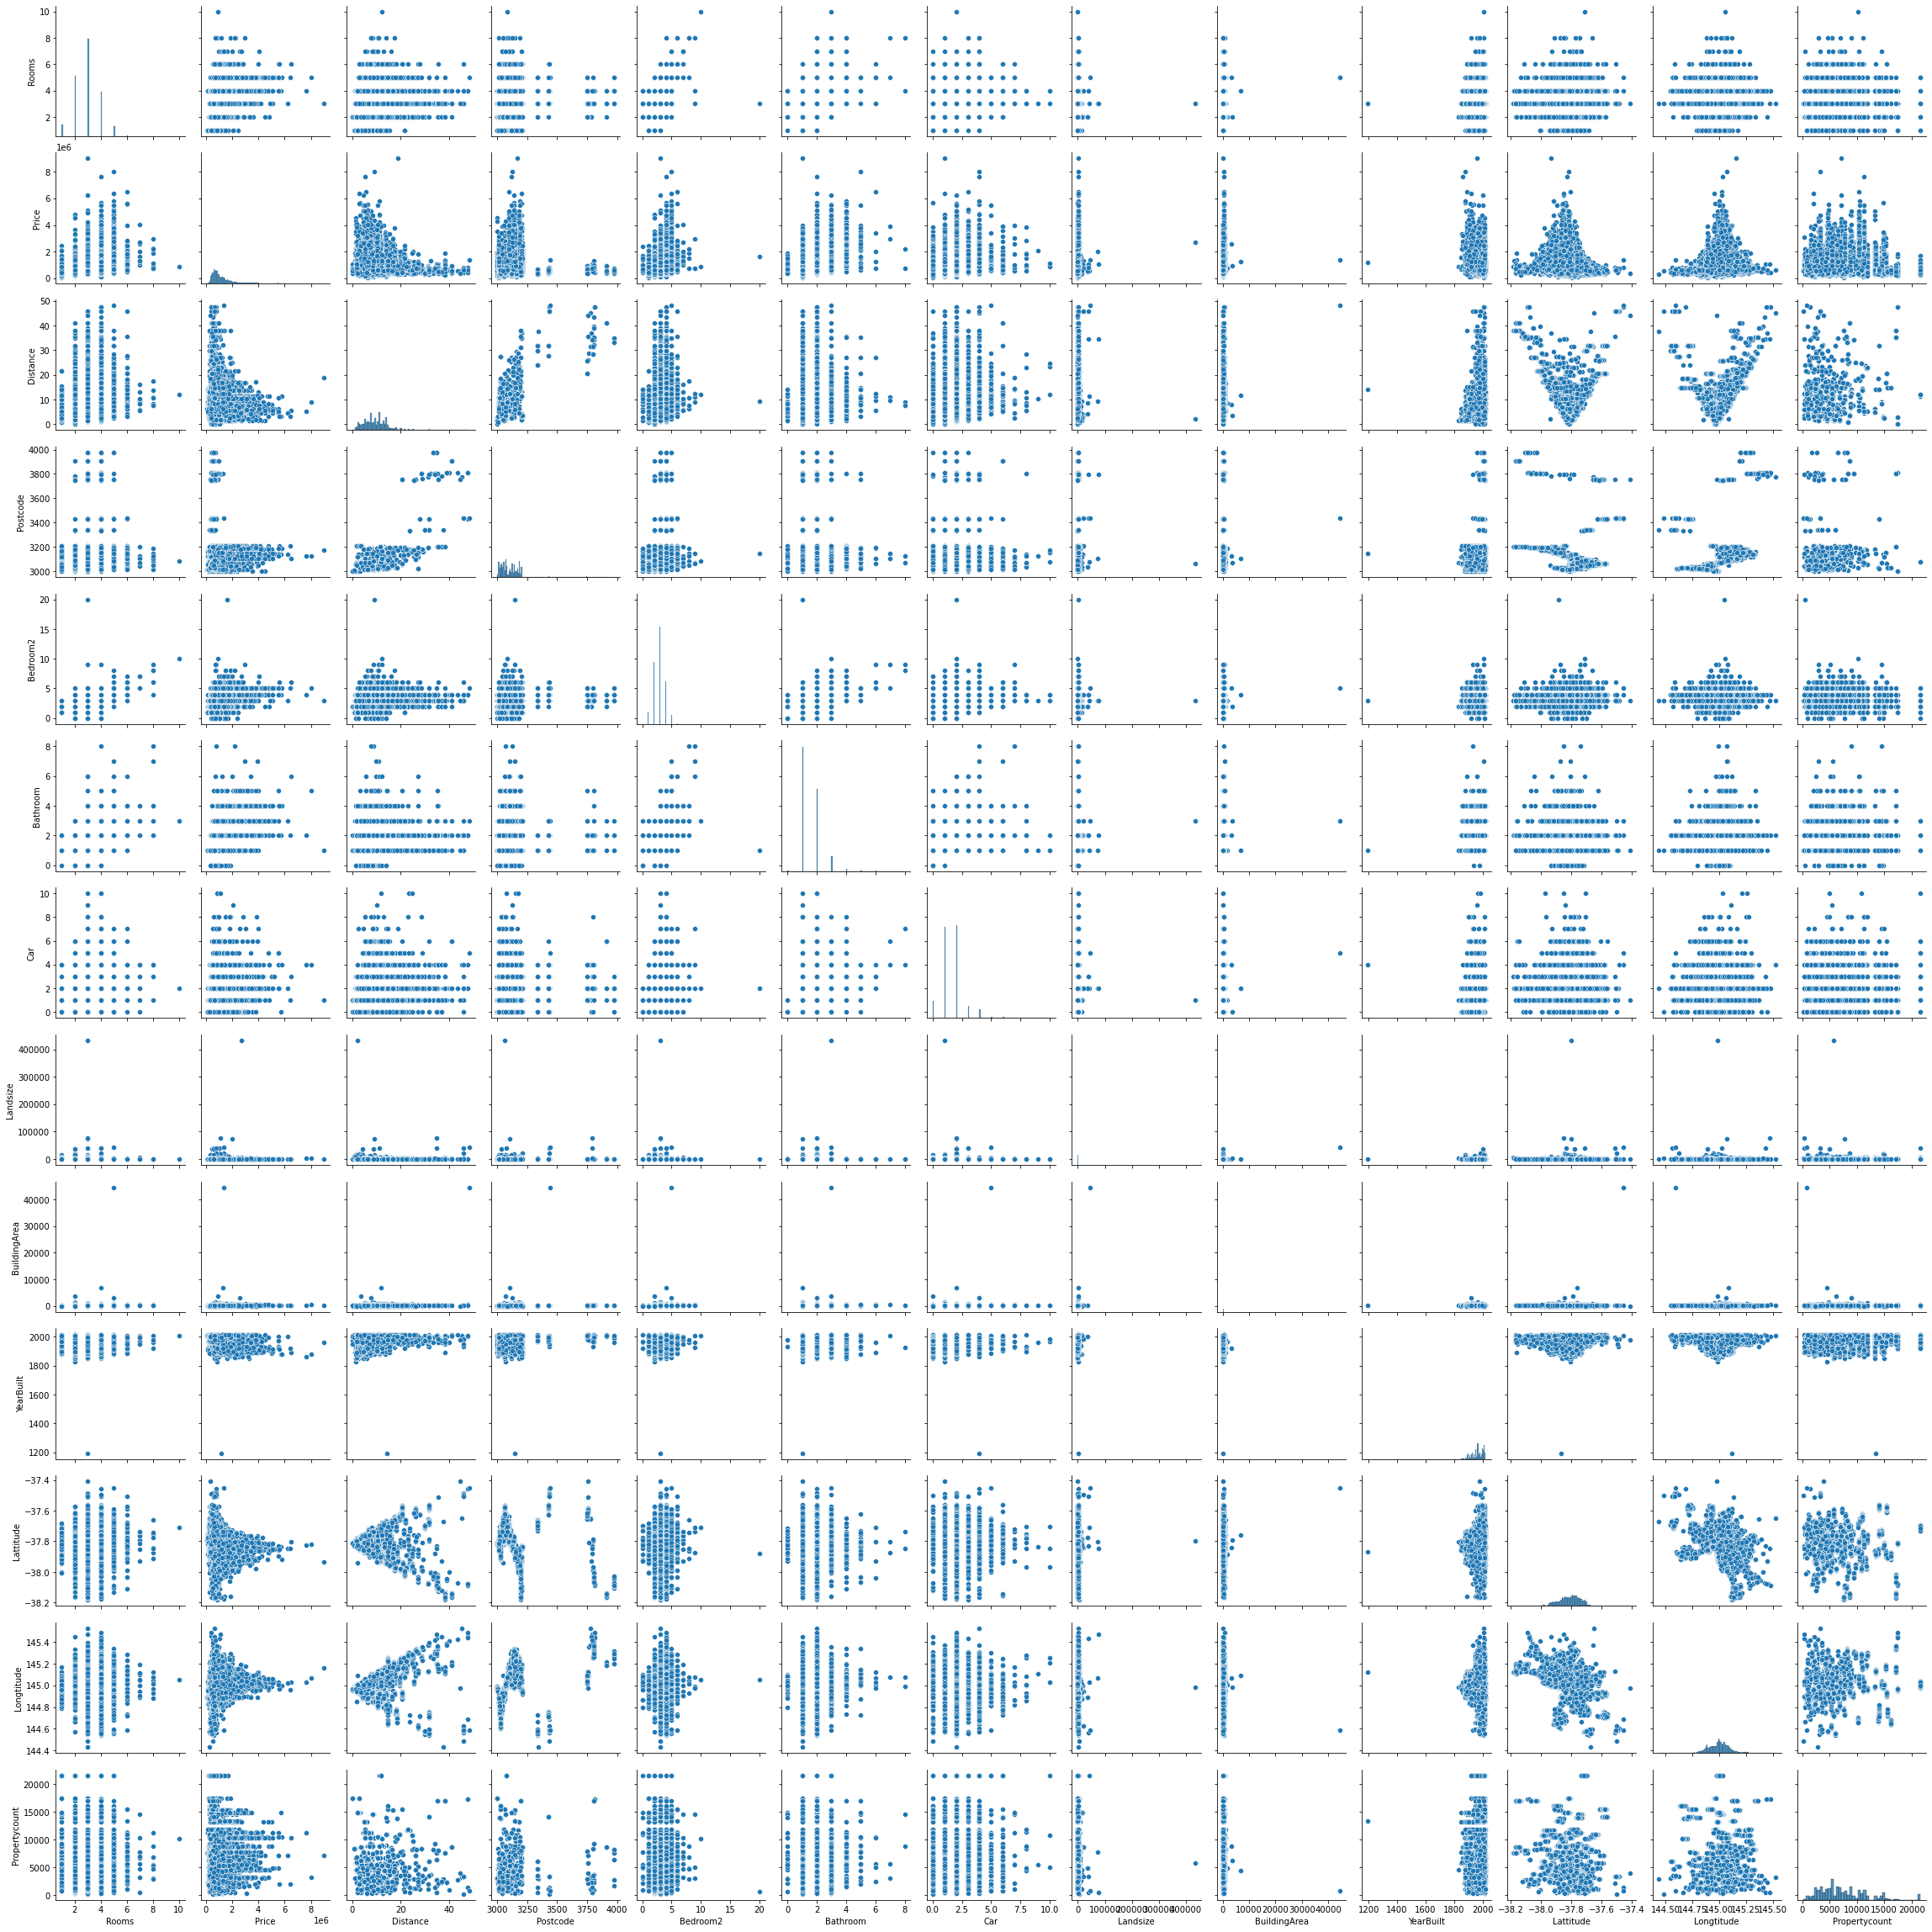

In [22]:
sns.pairplot(df_num)

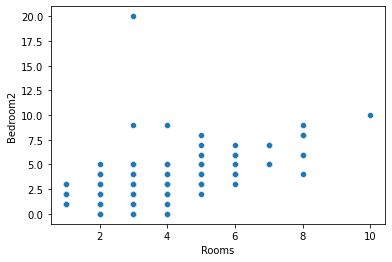

In [23]:
ax2 = sns.scatterplot(x = 'Rooms',y ='Bedroom2',data = data )

##### (b) Pearson Correlation Coefficient between the two variables

In [24]:
data.corr()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


In [25]:
data[['Bedroom2','Rooms']].corr()

,Bedroom2,Rooms
Bedroom2,1.00000,0.94419
Rooms,0.94419,1.00000


##### (c) Scatter plot of the fitted values of the line of best fit against the residuals

In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [27]:
model = ols(formula = 'Bedroom2~Rooms',data = data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Bedroom2   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                 1.116e+05
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:20:21   Log-Likelihood:                -3717.5
No. Observations:               13580   AIC:                             7439.
Df Residuals:                   13578   BIC:                             7454.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1112      0.009     12.595      0.000       0.094       0.128
Rooms          0.9542      0.003    334.005      0.000       0.949       0.960
==============================================================================
Omnibus:                    22456.524   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        232155865.330
Skew:                          10.041   Prob(JB):                         0.00
Kurtosis:                     643.224   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
b, m = res.params

(0.0, 11.0)

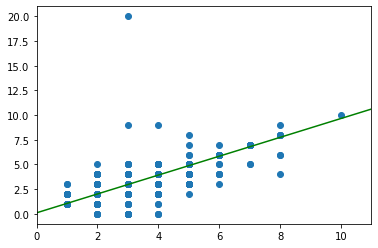

In [29]:
plt.scatter(x = data['Rooms'],y = data['Bedroom2'])
plt.axline((0,b),slope = m, color = 'green')
plt.xlim(0,11)

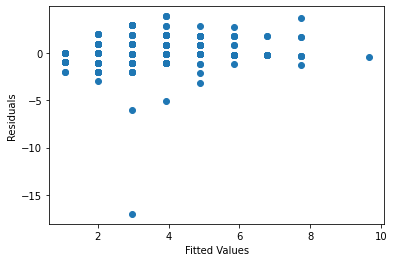

In [30]:
X = data['Rooms']
Y = data['Bedroom2']
Y_pred = m * X + b
residuals = Y_pred - Y

plt.scatter(Y_pred, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

##### 4.(a) Pick three variables that might be linearly correlated with Price (anything with Correlation Coefficient ρ satisfying |ρ| > 0.1) that satisfy a *weak* assumption of non-Multicolinearity (use a Correlation Coefficient ρ satisfying |ρ| > 0.75 to determine strongly colinear)

In [31]:
data['Car'] = data['Car'].fillna(0)
data.head(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


In [32]:
data[['Price','Rooms','Car','Distance', 'Bathroom', 'Bedroom2']].corr()

,Price,Rooms,Car,Distance,Bathroom,Bedroom2
Price,1.000000,0.496634,0.234825,-0.162522,0.467038,0.475951
Rooms,0.496634,1.000000,0.408364,0.294203,0.592934,0.944190
Car,0.234825,0.408364,1.000000,0.266082,0.322434,0.405046
Distance,-0.162522,0.294203,0.266082,1.000000,0.127155,0.295927
Bathroom,0.467038,0.592934,0.322434,0.127155,1.000000,0.584685
Bedroom2,0.475951,0.944190,0.405046,0.295927,0.584685,1.000000


In [33]:
# the independent variables set
X = data[['Rooms', 'Car', 'Distance']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

    feature       VIF
0     Rooms  6.433448
1       Car  4.592527
2  Distance  4.233670


##### We pick three varibales: Rooms, Car, Distance here. Since they might be linearly correlated with Price and satisfy a weak assumption of non-Multicolinearity.

##### (b) Perform OLS regression and report the R2.

In [34]:
model= ols(formula = 'Price ~ Rooms + Car + Distance',data = data)
reg = model.fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     2535.
Date:                Wed, 09 Mar 2022   Prob (F-statistic):               0.00
Time:                        13:20:21   Log-Likelihood:            -1.9779e+05
No. Observations:               13580   AIC:                         3.956e+05
Df Residuals:                   13576   BIC:                         3.956e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2.6e+05   1.48e+04     17.624      0.000    2.31e+05    2.89e+05
Rooms       3.744e+05   5150.774     72.693      0.000    3.64e+05    3.85e+05
Car         6.642e+04   5049.856     13.152      0.000    5.65e+04    7.63e+04
Distance   -3.855e+04    794.332    -48.537      0.000   -4.01e+04    -3.7e+04
==============================================================================
Omnibus:                     7439.543   Durbin-Watson:                   1.414
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           132277.915
Skew:                           2.245   Prob(JB):                         0.00
Kurtosis:                      17.616   Cond. No.                         42.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### The R_Squared is 0.359.

##### 5 (a) Create a validation set using ten percent of the data.

In [35]:
data_train, data_validation = train_test_split(data, test_size=0.1,random_state=16)

In [36]:
len(data_validation)/len(data)*100

10.0

##### (b) Engineer one new feature.

In [37]:
pysqldf = lambda q: sqldf(q, globals())
q = """
select *,
       case when Regionname = 'Western Victoria' then 1
            when Regionname = 'Northern Victoria' then 1
            when Regionname = 'Eastern Victoria' then 1
            when Regionname = 'Northern Metropolitan' then 2
            when Regionname = 'South-Eastern Metropolitan' then 2
            when Regionname = 'Western Metropolitan' then 2
            when Regionname = 'Eastern Metropolitan' then 3
            when Regionname = 'Southern Metropolitan' then 4
            else 0 end RegionNum
from data
"""
data = pysqldf(q)

In [38]:
data[['Price','RegionNum']].corr()

,Price,RegionNum
Price,1.000000,0.356309
RegionNum,0.356309,1.000000


##### (c) Use this validation set and the R^2 metric to decide if this new feature improves the model.

In [39]:
data_train, data_validation = train_test_split(data, test_size=0.1,random_state=16)

model = ols(formula = 'Price ~ Rooms + Car + Distance', data=data_train)
res = model.fit()
y_pred = res.predict(data_validation)
y = data_validation['Price']
r2 = r2_score(y, y_pred)

print(f'This model without the new feature has an R^2 on the validation set of {r2}')

model = ols(formula = 'Price ~ Rooms + Car + Distance + RegionNum', data=data_train)
res = model.fit()
y_pred = res.predict(data_validation)
y = data_validation['Price']
r2 = r2_score(y, y_pred)

print(f'This model with the new feature has an R^2 on the validation set of {r2}')

This model without the new feature has an R^2 on the validation set of 0.3398449356192328
This model with the new feature has an R^2 on the validation set of 0.4466740996021109


##### 6 (a) Create a new variable called above_median which indicates whether a house's price is above the median price for houses in this dataset.

In [40]:
data['above_median'] = data['Price'] > data['Price'].median()
data['is_above_median'] = data['above_median'].apply(lambda x: int(x == 1))
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,RegionNum,above_median,is_above_median
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,2,True,1
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,2,True,1
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,2,True,1
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,2,False,0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,2,True,1


##### (b) Report the accuracy of your model from Q5 created from the training set at predicting the new variable on the validation set.

In [41]:
data_train, data_validation = train_test_split(data, test_size=0.1,random_state=16)

model = ols(formula = 'Price ~ Rooms + Car + Distance + RegionNum', data=data_train)
res = model.fit()
y_pred = res.predict(data_validation)
y_pred_1 = y_pred > data_validation['Price'].median()
y_1 = data_validation['is_above_median']
correct = sum(y_pred_1 == data_validation['above_median'])
accuracy = correct / len(y_pred_1)
print(f'This model has accuracy: {100*accuracy}%')

This model has accuracy: 72.45949926362297%


##### (c) Perform logistic regression using the same training set and report the accuracy from this model on the same validation set.

In [42]:
model = logit(formula = 'is_above_median ~ Rooms + Car + Distance + RegionNum', data=data_train)
res = model.fit()
y_pred_prob = res.predict(data_validation)
y_pred_2 = (y_pred_prob >= 0.5).apply(int)
y_2 = data_validation['is_above_median']
acc = metrics.accuracy_score(y_2, y_pred_2)
print(f'The Accuracy of this model is {100*acc}%')

Optimization terminated successfully.
         Current function value: 0.485086
         Iterations 7
The Accuracy of this model is 76.58321060382917%


##### (d) Compute the Precision, Recall, and AUC for both models on the validation set.

In [43]:
recall = metrics.recall_score(y_1, y_pred_1)
prec = metrics.precision_score(y_1, y_pred_1)


print(f'The Recall of ols model is {recall}')
print(f'The Precision of ols model is {prec}')


recall = metrics.recall_score(y_2, y_pred_2)
prec = metrics.precision_score(y_2, y_pred_2)
auc = metrics.roc_auc_score(y_2, y_pred_prob)

print('')
print(f'The Recall of logit model is {recall}')
print(f'The Precision of logit model is {prec}')
print(f'The AUC of logit model is {auc}')

The Recall of ols model is 0.881638846737481
The Precision of ols model is 0.6624857468643102

The Recall of logit model is 0.7769347496206374
The Precision of logit model is 0.7496339677891655
The AUC of logit model is 0.841191947742385


##### 7. Perform a linear regression using the training set from Q5 with all numerical variables to predict Price and use either Lasso or Ridge regression. Report the R^2 on the validation set.

In [44]:
data_train2 = data_train[data_train['BuildingArea'].notna()]
data_train2 = data_train2[data_train2['YearBuilt'].notna()]
data_train2['Car'] = data_train2['Car'].fillna(0)

y_train = data_train2['Price']
X_train = data_train2[['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']]

reg = Lasso(alpha=1)
reg.fit(X_train, y_train)

data_test2 = data_validation[data_validation['BuildingArea'].notna()]
data_test2 = data_test2[data_test2['YearBuilt'].notna()]
data_test2['Car'] = data_test2['Car'].fillna(0)

y_test = data_test2['Price']
X_test = data_test2[['Rooms','Distance','Postcode','Bedroom2','Bathroom','Car','Landsize','BuildingArea','YearBuilt','Lattitude','Longtitude','Propertycount']]

print('R squared training set', round(reg.score(X_train, y_train),20))
print('R squared validation set', round(reg.score(X_test, y_test),20))

R squared training set 0.5978547513243578
R squared validation set 0.578555842778375
